## progan
progan은 해상도가 매우 높은 실제같은 이미지를 생성하는 모델이다.
텐서플로 허브에서 불러와서 사용하는 법을 익혀보자

## 모델 불러오기

hub.KerasLayer가 tf2 버전 코드이다.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub # 허브모듈 임포트

In [ ]:
module = hub.KerasLayer("https://tfhub.dev/google/progan-128/1") # 적절한 URL로 호출

In [ ]:
latent_dim = 512 # 생성할 샘플의 잠재 공간 차원

In [ ]:
latent_vector = tf.random.normal([1, latent_dim], seed = 1337)

In [ ]:
interpolated_images = module(latent_vector)

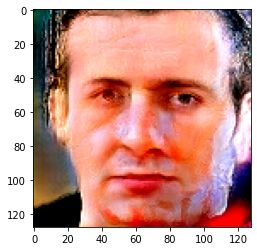

In [ ]:
plt.imshow(interpolated_images.numpy().reshape(128, 128, 3)) 
plt.show()

## 새로운 이미지 생성

-> latent_vector를 입력 모양에 맞게 넣으면 이미지를 생성한다.

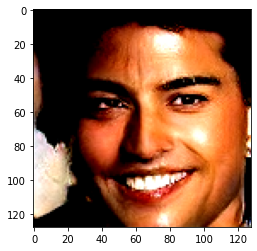

In [ ]:
# 시드를 바꾸면 다른 얼굴을 생성 -> 시드 바꿔보기
latent_vector = tf.random.normal([1, latent_dim], seed=1)

# 모듈을 사용해 잠재 공간에서 이미지를 생성
interpolated_images = module(latent_vector)

plt.imshow(interpolated_images.numpy().reshape(128,128,3))
plt.show()

## hub 공식 사이트따라 진행해보기

이번에는 교재말고 공식 사이트의 시나리오를 따라해보기로 했다.
-> 에러가 발생한다. 그 이유는 Module 메서드가 tf1 명령어이기 때문이다.

In [ ]:
# Generate 20 random samples.
generate = hub.Module("https://tfhub.dev/google/progan-128/1")
images = generate(tf.random_normal([20, 512]))

RuntimeError: ignored

In [ ]:
generate = hub.load("https://tfhub.dev/google/progan-128/1")

latent_dim = 512
latent_vector = tf.random.normal([1, latent_dim], seed=1337)

# 모듈을 사용해 잠재 공간에서 이미지를 생성합니다.
interpolated_images = generate(latent_vector)

TypeError: ignored

평소에 궁금했던 i3d 모델 허브에서 불러와봤다.
-> 이 또한 Module 메서드는 에러가 발생한다.

In [ ]:
module = hub.Module("https://tfhub.dev/deepmind/i3d-kinetics-400/1")

RuntimeError: ignored

In [ ]:
# 역시 공식 사이트 꺼는 안되는데 이건 된다.
i3d = hub.load("https://tfhub.dev/deepmind/i3d-kinetics-400/1").signatures['default']

###  seed 바뀜에 따라 값이 바뀌는 걸 보여준다. progan이 고화질 이미지를 생성하는 것을 확인할 수 있다.

In [ ]:
# 간단히 이미지를 출력합니다.
def display_image(image):
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

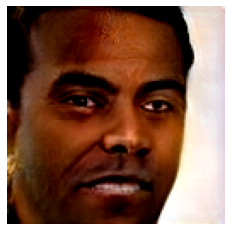

In [ ]:
image_from_module_space = True
latent_dim = 512

def get_module_space_image():
    module = hub.KerasLayer("https://tfhub.dev/google/progan-128/1")
    vector = tf.random.normal([1, latent_dim], seed=7777)
    images = module(vector)
    return images[0]

def upload_image():
    uploaded = files.upload()
    image = imageio.imread(uploaded[uploaded.keys()[0]])
    return transform.resize(image, [128, 128])

if image_from_module_space:
    target_image = get_module_space_image()
else:
    target_image = upload_image()
display_image(target_image)